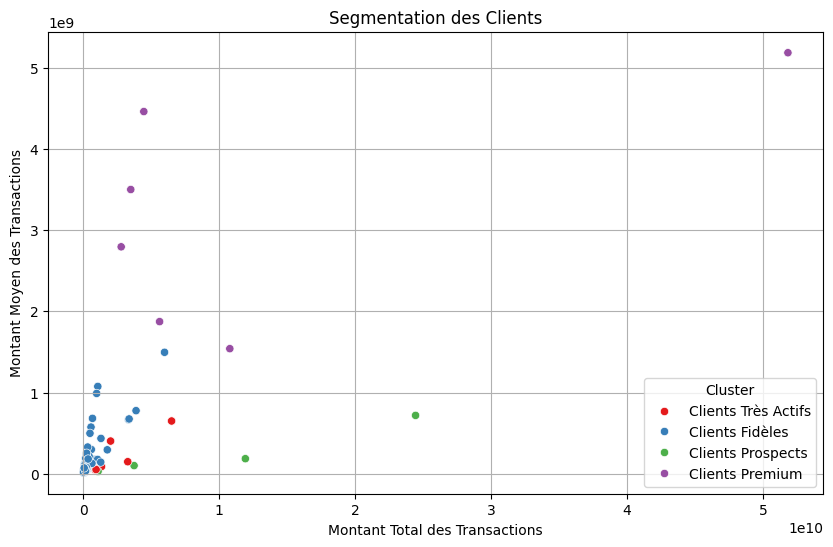

Analyse des Segments :


Segment  Nombre de Clients  Montant Total Moyen  Montant Total  \
0      Clients Premium                  6         1.316707e+10   7.900240e+10   
1      Clients Fidèles                 64         5.542332e+08   3.547093e+10   
2  Clients Très Actifs                  7         2.266012e+09   1.586209e+10   
3    Clients Prospects                  4         1.030455e+10   4.121822e+10   

   Montant Moyen  Nombre Moyen de Transactions  \
0   3.225524e+09                      3.833333   
1   2.065454e+08                      2.531250   
2   2.086391e+08                     14.428571   
3   2.590718e+08                     43.000000   

   Fréquence Moyenne des Transactions  Nombre Moyen de Partenaires  \
0                            2.000000                     3.833333   
1                            1.851562                     2.453125   
2                            3.828571                    14.428571   
3                           11.150000                    42.250000   

   Nombre Moyen d'Années Actives  
0                       1.666667  
1                       1.359375  
2                       3.857143  
3                       4.250000


Résultats de la Segmentation des Clients :


CLI  Total_Montant  Mean_Montant  Nb_Transactions  Freq_Transactions  \
0        830   1.350008e+09  9.000053e+07               15               3.75   
1     124700   4.461000e+07  2.230500e+07                2               1.00   
2    8022400   7.206005e+08  1.801501e+08                4               2.00   
3    8022600   8.093762e+07  1.348960e+07                6               3.00   
4    8022700   2.037730e+08  2.037730e+08                1               1.00   
..       ...            ...           ...              ...                ...   
76  28671011   1.782812e+08  3.565625e+07                5               5.00   
77  33186820   7.222992e+07  7.222992e+07                1               1.00   
78  40158835   2.539019e+08  2.539019e+08                1               1.00   
79  52318361   3.650515e+08  1.825257e+08                2               1.00   
80  71023400   1.307718e+09  4.359061e+08                3               3.00   

    Nb_Partenaires  Annees_Actives         Cluster_Name  
0               15               4  Clients Très Actifs  
1                2               2      Clients Fidèles  
2                4               2      Clients Fidèles  
3                5               2      Clients Fidèles  
4                1               1      Clients Fidèles  
..             ...             ...                  ...  
76               5               1      Clients Fidèles  
77               1               1      Clients Fidèles  
78               1               1      Clients Fidèles  
79               2               2      Clients Fidèles  
80               3               1      Clients Fidèles  

[81 rows x 8 columns]

In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données
file_path = 'Credoc 2019_2024.csv'
credoc_data = pd.read_csv(file_path, delimiter=';')

# Convertir les dates en périodes mensuelles
credoc_data['DOU'] = pd.to_datetime(credoc_data['DOU'], format='%d/%m/%Y', errors='coerce')
credoc_data['Year'] = credoc_data['DOU'].dt.year

# Calculer les caractéristiques pour chaque client
client_features = credoc_data.groupby(['CLI', 'NOM']).agg({
    ' MONT_LOC ': ['sum', 'mean', 'count'],
    'NDOS': pd.Series.nunique,
    'Year': pd.Series.nunique
}).reset_index()


# Renommer les colonnes pour faciliter la manipulation
client_features.columns = ['CLI', 'Nom_CLI', 'Total_Montant', 'Mean_Montant', 'Nb_Transactions', 'Nb_Partenaires', 'Annees_Actives']

# Calculer la fréquence des transactions
client_features['Freq_Transactions'] = client_features['Nb_Transactions'] / client_features['Annees_Actives']

# Normaliser les données
scaler = StandardScaler()
scaled_features = scaler.fit_transform(client_features[['Total_Montant', 'Mean_Montant', 'Nb_Transactions', 'Freq_Transactions', 'Nb_Partenaires', 'Annees_Actives']])

# Appliquer K-means
kmeans = KMeans(n_clusters=4, random_state=42)
client_features['Cluster'] = kmeans.fit_predict(scaled_features)

# Analyser les segments pour comprendre leurs caractéristiques
segment_analysis = client_features.groupby('Cluster').agg({
    'Total_Montant': ['mean', 'sum'],
    'Mean_Montant': 'mean',
    'Nb_Transactions': 'mean',
    'Freq_Transactions': 'mean',
    'Nb_Partenaires': 'mean',
    'Annees_Actives': 'mean'
}).reset_index()

# Nommer les clusters en fonction des caractéristiques
cluster_names = {
    0: 'Clients Premium',      # Montant Total et Moyen très élevés, Faible nombre de Transactions et Fréquence, Partenaires et Années Actives modérées
    1: 'Clients Fidèles',      # Montant Total et Moyen modérés, Nombre de Transactions, Fréquence, Partenaires et Années Actives modérées
    2: 'Clients Très Actifs',  # Montant Total modéré, Montant Moyen faible, Nombre de Transactions, Fréquence, Partenaires et Années Actives très élevés
    3: 'Clients Prospects'     # Montant Total très élevé, Montant Moyen modéré, Nombre de Transactions, Fréquence, Partenaires et Années Actives très élevés
}
client_features['Cluster_Name'] = client_features['Cluster'].map(cluster_names)

# Visualiser les résultats
plt.figure(figsize=(10, 6))
sns.scatterplot(data=client_features, x='Total_Montant', y='Mean_Montant', hue='Cluster_Name', palette='Set1')
plt.title('Segmentation des Clients')
plt.xlabel('Montant Total des Transactions')
plt.ylabel('Montant Moyen des Transactions')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Ajouter le nombre de clients par cluster à l'analyse des segments
segment_analysis.columns = [
    'Cluster', 
    'Montant Total Moyen', 
    'Montant Total', 
    'Montant Moyen', 
    'Nombre Moyen de Transactions', 
    'Fréquence Moyenne des Transactions', 
    'Nombre Moyen de Partenaires', 
    'Nombre Moyen d\'Années Actives'
]
segment_analysis['Nombre de Clients'] = client_features['Cluster'].value_counts().sort_index().values

# Associer les noms de clusters
segment_analysis['Segment'] = segment_analysis['Cluster'].map(cluster_names)

# Réorganiser les colonnes pour une meilleure lisibilité
segment_analysis = segment_analysis[['Segment', 'Nombre de Clients', 'Montant Total Moyen', 'Montant Total', 'Montant Moyen', 'Nombre Moyen de Transactions', 'Fréquence Moyenne des Transactions', 'Nombre Moyen de Partenaires', 'Nombre Moyen d\'Années Actives']]

# Afficher les résultats de l'analyse des segments
print("Analyse des Segments :")
display(segment_analysis)

# Afficher les résultats de la segmentation des clients
print("\nRésultats de la Segmentation des Clients :")
display(client_features[['CLI', 'Total_Montant', 'Mean_Montant', 'Nb_Transactions', 'Freq_Transactions', 'Nb_Partenaires', 'Annees_Actives', 'Cluster_Name']])


C:\Users\user\AppData\Local\Temp\ipykernel_23428\4250641031.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_clients_per_cluster = client_features.groupby('Cluster').apply(lambda x: x.nlargest(10, 'Total_Montant')).reset_index(drop=True)
C:\Users\user\AppData\Local\Temp\ipykernel_23428\4250641031.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total_Montant', y='Nom_CLI', data=cluster_data, ax=ax, palette='Set2')
C:\Users\user\AppData\Local\Temp\ipykernel_23428\4250641031.py:11: FutureWarning: 

Passing `palette` without assigning `h

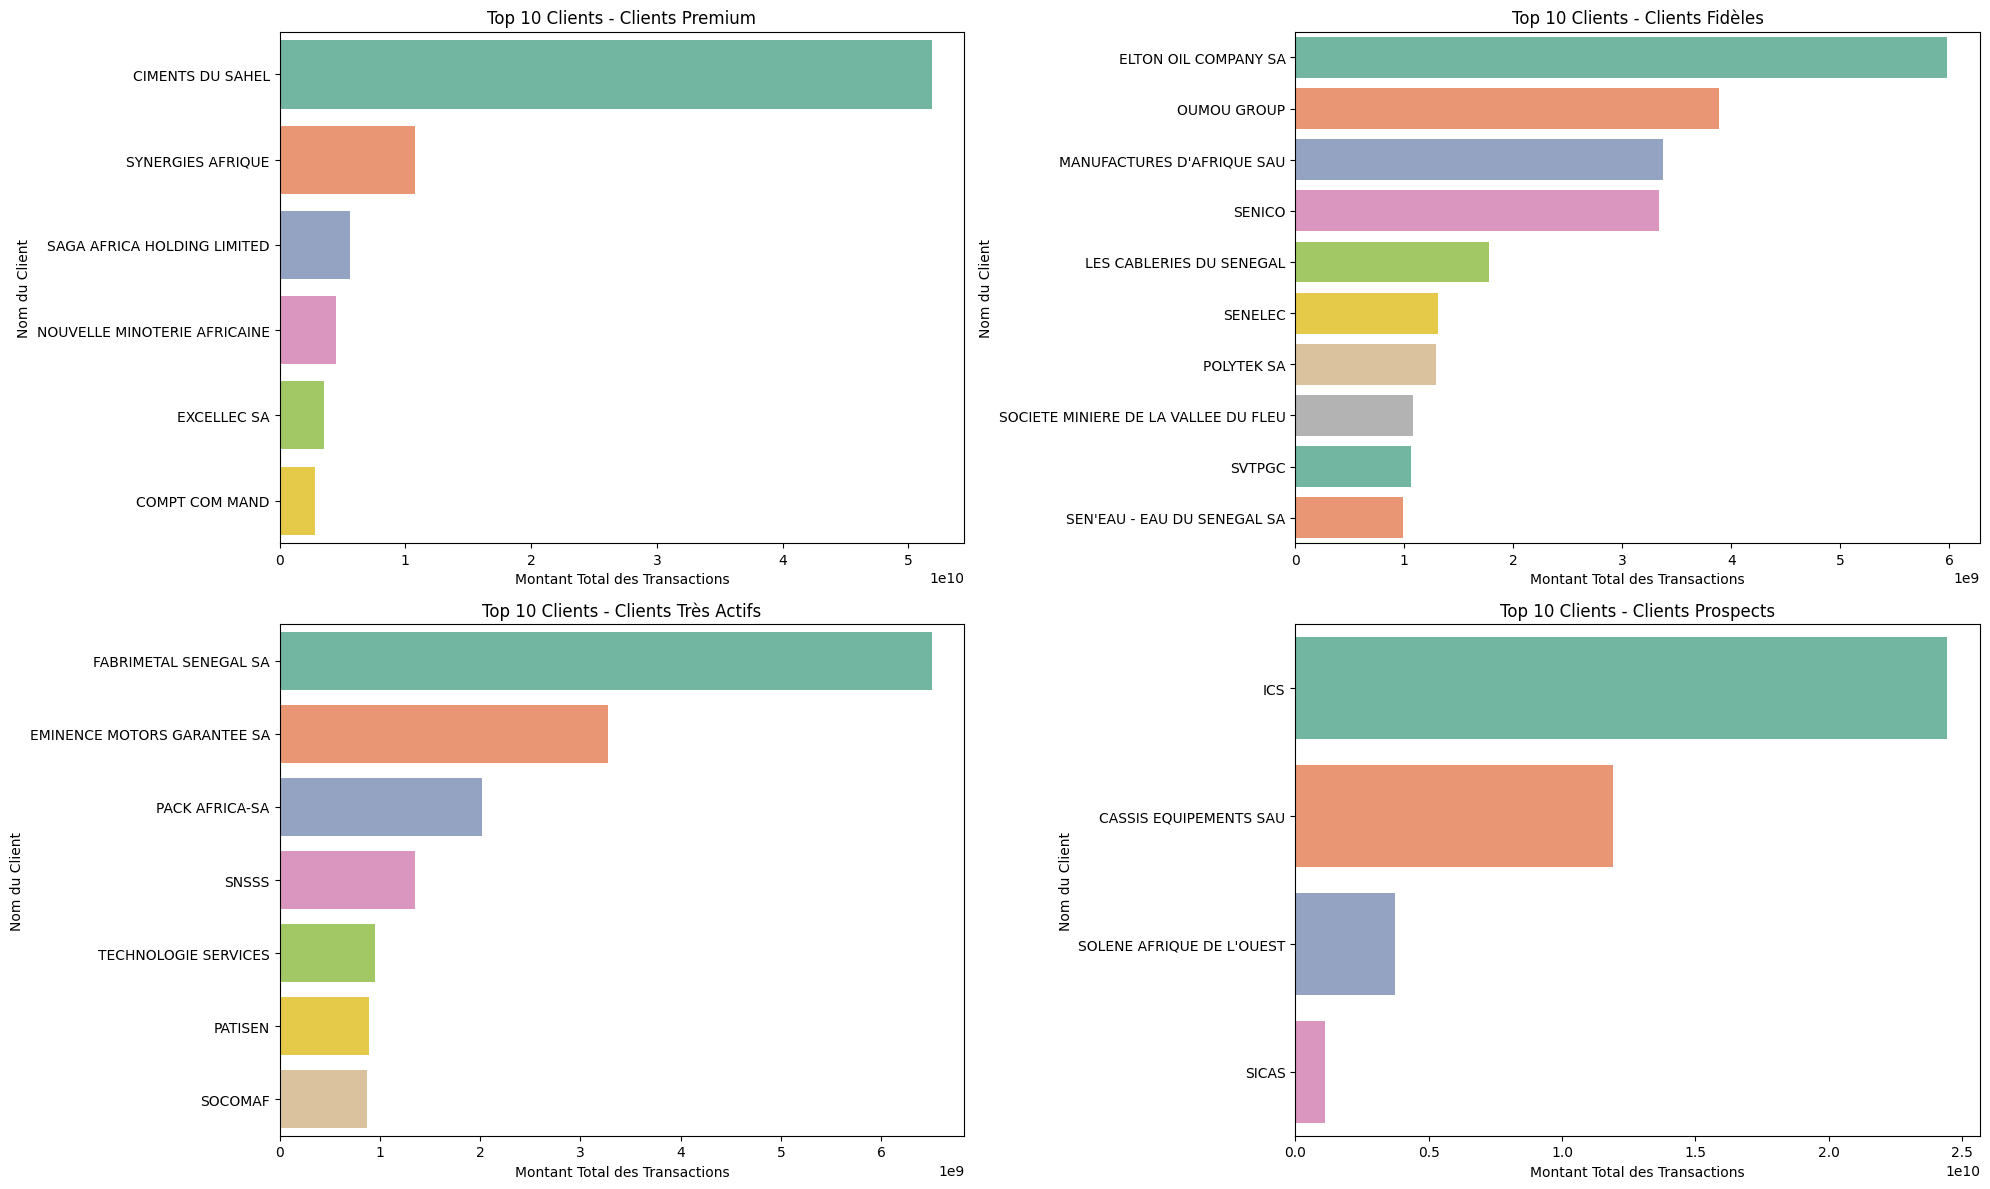

In [18]:
# Déterminer les top 10 clients par cluster
top_clients_per_cluster = client_features.groupby('Cluster').apply(lambda x: x.nlargest(10, 'Total_Montant')).reset_index(drop=True)

# Créer des sous-graphes pour les top 10 clients de chaque cluster
fig, axs = plt.subplots(2, 2, figsize=(20, 12))
clusters = top_clients_per_cluster['Cluster'].unique()

for i, cluster in enumerate(clusters):
    ax = axs[i // 2, i % 2]
    cluster_data = top_clients_per_cluster[top_clients_per_cluster['Cluster'] == cluster]
    sns.barplot(x='Total_Montant', y='Nom_CLI', data=cluster_data, ax=ax, palette='Set2')
    ax.set_title(f'Top 10 Clients - {cluster_names[cluster]}')
    ax.set_xlabel('Montant Total des Transactions')
    ax.set_ylabel('Nom du Client')

plt.tight_layout()
plt.show()